In [1]:
#Notes about 3 Factor Model
#Higher expected rets go w higher betas

#3 Factors are: b , h , s. These are 3 BETAS that comes from time-series regressions
    #b = rets on mkt portfolio (mkt AKA all stocks together, value-weighted) ~1 REGARDLESS OF BOOK-TO-MKT EQUITY SIZE
    #h = small - big port (S&P AKA Small stocks - ret of large stocks) INCREASES W BOOK-TO-MKT EQUITY SIZE
    #s = high - low port (HML AKA Combo of value stocks - Portion of growth stocks) INCREASES W BOOK-TO-MKT EQUITY SIZE

#We want to know: "Is there a diff in the returns?"
    #"Yes, small and value stocks produce higher rets"
#"What does the Fama Model test?"
    #"If the model describes expected returns, the regression intercepts should ~0"
    #This model is about AVERAGE RETS VS. BETAS.. T stat and r^2 look great tho. Note that:
        #r^2 explains ret var over time
        #alpha explains variation across portfolios and avg
#"The regression done for this model is only to show the data."


***
## Learning Objective:
    - Understand actual data
    - Enhance your understanding of Fama-French 3 Factor Model
    - Extract data, Calculate log return - DataFrames \& Numpy
    - Implement OLS regressions 
    - Additional Readings - extend and generalize your understanding in factor investing.
***

___Detail___:

Select 10 stocks you are interested in. Form your portfolio using the stocks you selected (assign the weights by yourself). 

- ___Run the FF3F model and estimate the factor loadings___. Assume the time-span is Jan 1 2010 - April 1 2020. 
    
- How to interpret the coefficients you obtained ($\beta_{MKT}$, $\beta_{SMB}$, and $\beta_{HML}$)? 
    
- Based on the ___readings 4, 5,and 6___, provide a discussion to present your understanding in 'Risk', 'Factor investing', 'Portfolio', and 'Portfolio Returns'.

***
Reading: 

1. Fama/French 3 Factors [Daily] : https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

2. DataReader (FamaFrenchReader): https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html

3. Relying on factors in crises: https://www.blackrock.com/us/individual/investment-ideas/what-is-factor-investing/factor-commentary/andrews-angle/relying-on-factors-in-crises

4. Factor, not just asset, allocation: https://www.blackrock.com/us/individual/investment-ideas/what-is-factor-investing/factor-commentary/andrews-angle/factor-allocation

5. Long-short factor investing: https://www.blackrock.com/us/individual/investment-ideas/what-is-factor-investing/factor-commentary/andrews-angle/long-short-factors

6. Factor Investing - A Further Look at Valuation: https://investmentsandwealth.org/getattachment/b3f47a09-866f-40b0-95b9-94bcb15f4f5b/IWM18JanFeb-FactorsIsItTimeToTilt.pdf

In [2]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
start, end = dt.datetime(2010, 1, 1), dt.datetime(2020, 4, 1)

In [3]:
l_tickers=['COST', 'DG', 'IPAR', 'LANC', 'TGT', 'KO', 'PEP', 'BGS', 'BF-B', 'ANDE']
df_raw_price=pd.DataFrame()
for ticker in l_tickers:
    df=web.DataReader(ticker, 'yahoo', start, end)
    df_raw_price[ticker]=df['Close']
    #print(ticker)
    #print(df_raw_price.columns)

In [4]:
df_raw_price

,COST,DG,IPAR,LANC,TGT,KO,PEP,BGS,BF-B,ANDE
Date,,,,,,,,,,
2010-01-04,59.410000,23.080000,12.630000,49.900002,48.549999,28.520000,61.240002,9.260000,14.346667,17.586666
2010-01-05,59.230000,23.260000,12.500000,50.389999,48.730000,28.174999,61.980000,9.480000,14.197333,17.520000
2010-01-06,60.000000,23.580000,12.870000,50.570000,49.660000,28.165001,61.360001,9.590000,14.394667,17.453333
2010-01-07,59.709999,23.740000,12.680000,50.490002,50.270000,28.094999,60.970001,9.540000,14.253333,17.326668
2010-01-08,59.279999,23.870001,12.160000,50.380001,50.070000,27.575001,60.770000,9.340000,14.250667,16.973333
...,...,...,...,...,...,...,...,...,...,...
2020-03-26,292.299988,140.520004,49.240002,137.020004,96.070000,44.290001,120.260002,16.740000,55.279999,17.730000
2020-03-27,284.329987,146.119995,47.869999,133.699997,94.739998,42.810001,120.459999,16.799999,54.500000,17.740000
2020-03-30,291.119995,146.770004,49.770000,137.839996,96.010002,45.000000,125.480003,16.860001,56.630001,18.129999


In [5]:
#construct stock ret
df_log_ret = np.log(df_raw_price / df_raw_price.shift(1))
df_log_ret.head()

,COST,DG,IPAR,LANC,TGT,KO,PEP,BGS,BF-B,ANDE
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.003034,0.007769,-0.010346,0.009772,0.003701,-0.012171,0.012011,0.023480,-0.010464,-0.003798
2010-01-06,0.012916,0.013664,0.029170,0.003566,0.018905,-0.000355,-0.010054,0.011537,0.013804,-0.003812
2010-01-07,-0.004845,0.006762,-0.014873,-0.001583,0.012209,-0.002489,-0.006376,-0.005227,-0.009867,-0.007284
2010-01-08,-0.007228,0.005461,-0.041874,-0.002181,-0.003986,-0.018682,-0.003286,-0.021187,-0.000187,-0.020603


Text(0.5, 1.0, 'Daily Stock Ret (Jan 2000 to Mar 2020)')

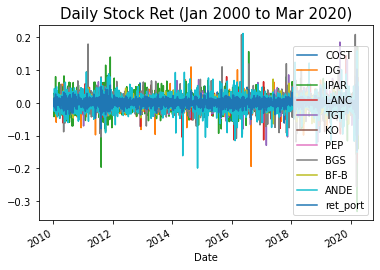

In [6]:
#create portfolio ret
df_log_ret['ret_port'] = (df_log_ret.COST + df_log_ret.DG + df_log_ret.IPAR + df_log_ret.LANC)/4

import matplotlib.pyplot as plt
df_log_ret.plot()
plt.title('Daily Stock Ret (Jan 2000 to Mar 2020)', fontsize = 15)

In [7]:
df_ff3f_daily = web.DataReader('F-F_Research_Data_Factors_Daily', 'famafrench', start, end)[0]   #[0] calls dataframe
df_ff3f_daily.rename(columns={'Mkt-RF': 'MKT'}, inplace = True)
df_ff3f_daily

,MKT,SMB,HML,RF
Date,,,,
2010-01-04,1.69,0.58,1.12,0.000
2010-01-05,0.31,-0.60,1.19,0.000
2010-01-06,0.13,-0.24,0.57,0.000
2010-01-07,0.40,0.08,0.93,0.000
2010-01-08,0.33,0.39,-0.01,0.000
...,...,...,...,...
2020-03-26,6.02,-0.67,1.20,0.006
2020-03-27,-3.48,-0.78,-0.69,0.006
2020-03-30,3.16,-0.35,-2.16,0.006


In [8]:
#test = web.DataReader('F-F_Research_Data_Factors_Daily', 'famafrench', start, end)    #testing
#l_keys = list (test.keys())
#for ikey in l_keys:
    #print (ikey)
    #print (test)          #dict contains two components: dataframes and a disclaimer

<AxesSubplot:xlabel='Date'>

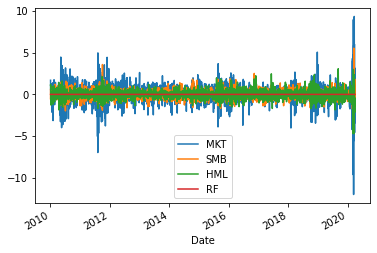

In [9]:
df_ff3f_daily.plot()                                #visualize, note the fin crisi period reflected

In [10]:
#want to merge factor and stock together, then run regression
df_new = pd.merge(df_log_ret, df_ff3f_daily, how='left', left_on=['Date'], right_on=['Date'])

In [11]:
#regress port ret on each factor
import statsmodels.formula.api as smf
results = smf.ols(formula='ret_port ~ MKT + SMB + HML', data=df_new, missing='drop').fit()
#indicate using just defined new df above^     #ignore missing data points bc it will impact regression otherwise

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ret_port   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1004.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:50:40   Log-Likelihood:                 8746.4
No. Observations:                2578   AIC:                        -1.748e+04
Df Residuals:                    2574   BIC:                        -1.746e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      1.377      0.1

In [ ]:
#2 main factor types:
#MACRO drives ret ACROSS asset class like inflation, real rates
#STYLE drives ret WITHIN " " like val, momentum